In [42]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Carregamento dos dados de avaliações
avaliacoes = pd.read_csv('./u.data', sep='\t', names=['usuario_id', 'movie_id', 'nota', 'timestamp'])

# Carregamento dos dados dos filmes
filmes = pd.read_csv(
    './u.item',
    sep='|',
    encoding='latin-1',
    header=None,
    names=['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
           'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
           'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
           'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
)
# Visualização inicial dos dados
print('Exemplos iniciais de avaliações:')
print(avaliacoes.head())

Exemplos iniciais de avaliações:
   usuario_id  movie_id  nota  timestamp
0         196       242     3  881250949
1         186       302     3  891717742
2          22       377     1  878887116
3         244        51     2  880606923
4         166       346     1  886397596


In [43]:
print('\nInformações dos primeiros filmes:')
print(filmes[['movie_id', 'title', 'release_date']].head())


Informações dos primeiros filmes:
   movie_id              title release_date
0         1   Toy Story (1995)  01-Jan-1995
1         2   GoldenEye (1995)  01-Jan-1995
2         3  Four Rooms (1995)  01-Jan-1995
3         4  Get Shorty (1995)  01-Jan-1995
4         5     Copycat (1995)  01-Jan-1995


In [44]:
# Informações gerais sobre os dados
print('Informações sobre o DataFrame de avaliações:')
print(avaliacoes.info())

print('\nEstatísticas descritivas das notas:')
print(avaliacoes['nota'].describe())

Informações sobre o DataFrame de avaliações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   usuario_id  100000 non-null  int64
 1   movie_id    100000 non-null  int64
 2   nota        100000 non-null  int64
 3   timestamp   100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

Estatísticas descritivas das notas:
count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: nota, dtype: float64


In [47]:
# Quantidade de filmes e usuários únicos
total_filmes = avaliacoes['movie_id'].nunique()
total_usuarios = avaliacoes['usuario_id'].nunique()

print(f'\nNúmero total de filmes avaliados: {total_filmes}')
print(f'Número total de usuários: {total_usuarios}')


Número total de filmes avaliados: 1682
Número total de usuários: 943


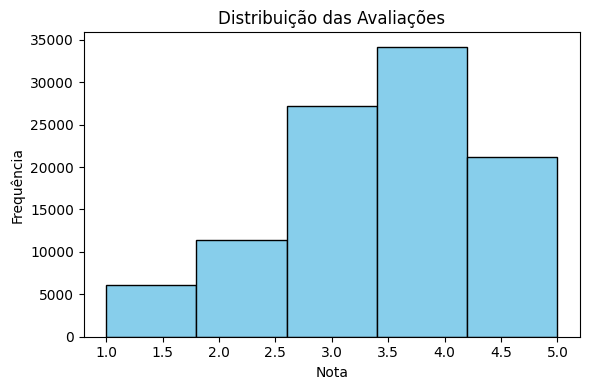

In [48]:
# Gráfico: distribuição das avaliações
plt.figure(figsize=(6, 4))
avaliacoes['nota'].hist(bins=5, color='skyblue', edgecolor='black')
plt.title('Distribuição das Avaliações')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.grid(False)
plt.tight_layout()
plt.show()


Filmes com maior número de avaliações:
                           title  count
0               Star Wars (1977)    583
1                 Contact (1997)    509
2                   Fargo (1996)    508
3      Return of the Jedi (1983)    507
4               Liar Liar (1997)    485
5    English Patient, The (1996)    481
6                  Scream (1996)    478
7               Toy Story (1995)    452
8           Air Force One (1997)    431
9  Independence Day (ID4) (1996)    429


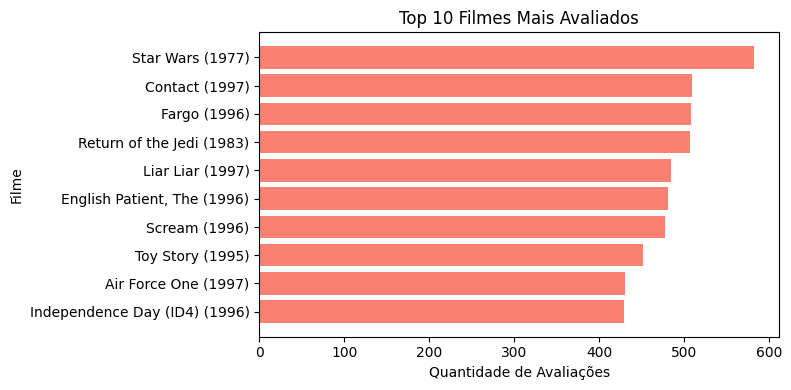

In [51]:
# Identificação dos 10 filmes mais avaliados
frequencia_avaliacoes = avaliacoes.groupby('movie_id').size().reset_index(name='count')
top_avaliados = frequencia_avaliacoes.sort_values(by='count', ascending=False).head(10)
top_avaliados = pd.merge(top_avaliados, filmes[['movie_id', 'title']], on='movie_id')

print('\nFilmes com maior número de avaliações:')
print(top_avaliados[['title', 'count']])

# Gráfico: filmes mais avaliados
plt.figure(figsize=(8, 4))
plt.barh(top_avaliados['title'], top_avaliados['count'], color='salmon')
plt.title('Top 10 Filmes Mais Avaliados')
plt.xlabel('Quantidade de Avaliações')
plt.ylabel('Filme')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Top 10 filmes com melhores notas (mínimo de 100 avaliações):
                              title      mean  count
0             Close Shave, A (1995)  4.491071    112
1           Schindler's List (1993)  4.466443    298
2        Wrong Trousers, The (1993)  4.466102    118
3                 Casablanca (1942)  4.456790    243
4  Shawshank Redemption, The (1994)  4.445230    283
5                Rear Window (1954)  4.387560    209
6        Usual Suspects, The (1995)  4.385768    267
7                  Star Wars (1977)  4.358491    583
8               12 Angry Men (1957)  4.344000    125
9               Citizen Kane (1941)  4.292929    198


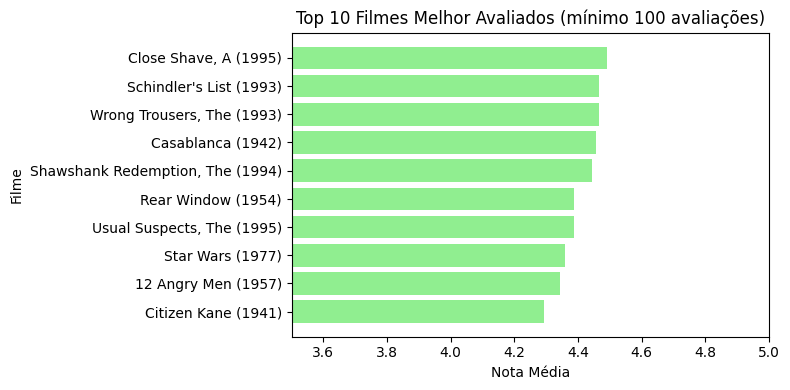

In [54]:
# Cálculo das médias de avaliação com no mínimo 100 avaliações por filme
media_avaliacoes = avaliacoes.groupby('movie_id')['nota'].agg(['mean', 'count']).reset_index()
media_avaliacoes = media_avaliacoes[media_avaliacoes['count'] >= 100]
melhores_filmes = media_avaliacoes.sort_values(by='mean', ascending=False).head(10)
melhores_filmes = pd.merge(melhores_filmes, filmes[['movie_id', 'title']], on='movie_id')

print('\nTop 10 filmes com melhores notas (mínimo de 100 avaliações):')
print(melhores_filmes[['title', 'mean', 'count']])

# Gráfico: melhores filmes por nota média
plt.figure(figsize=(8, 4))
plt.barh(melhores_filmes['title'], melhores_filmes['mean'], color='lightgreen')
plt.title('Top 10 Filmes Melhor Avaliados (mínimo 100 avaliações)')
plt.xlabel('Nota Média')
plt.ylabel('Filme')
plt.xlim(3.5, 5)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()